# Зафатена роботска рака

Функционирањето на една роботска рака во некој производствен систем треба да се моделира со Маркова верига, при што времето е поделено на дискретни и еднакви интервали. Во секој даден момент, веројатноста дека раката ќе добие задача за пренос на некој објект е $\alpha$. Ако раката е зафатена со пренос, која било нова задача ќе биде изгубена. Веројатноста пак дека раката успешно ќе ја заврши зададената задача во секој даден момент е $\beta$. Конечно, ако се случи тековната задача да биде завршена, а нова задача биде генерирана во ист временски интервал, тогаш раката веднаш ќе пристапи кон извршување на новата задача. Извршувањето на тековната задача и појавата на новата се настани кои се независни еден од друг.
1.  Процесот да се претстави како случаен Марков процес, односно да се опише со дијаграм на пренос и со матрица на премини Р, така што ќе се состои само од две состојби кои ќе ја означуваат зафатеноста на раката.
2.  Ако веројатноста за доаѓање на нова задача во кој било момент е 75%, колкава треба да е веројатноста на извршување на тековна задача за роботот да има искористеност од 99% во стационарен режим? Дали одговорот има логика? На што се должи тој?

## Решение

### Одговор на задача 1

Ќе имаме две состојби, слободна и зафатена. Од текстот на задача, преминуваме од слободната состојба во зафатената со веројатност $a$ бидејќи сме добиле нова задача. Ако не добиеме задача си остануваме во истата состојба со веројатност $1-a$. Внимавајте, при моделирањето многу лесно може да погрешите ако веројатноста $b$, која ја означува веројатноста роботот да заврши со работа, ја поставите да биде  веројатност на преминот од зафатената состојба во слободната. Тука мора да биде моделирана и веројатноста роботот да не добие нова задача. Затоа, преминуваме од зафатената состојба во слободната кога роботот ќе заврши со задачата $(b)$ и нема да добие нова задача $(1-a)$. Бидејќи и двата случаи мора да случат, добиваме $b(1-a)$ Останува уште последниот случај, да ја одредиме веројатноста за која роботот ќе остане во зафатената состојба. Таму ќе остане ако не ја завршил задачата во овој момент $(1-b)$, или пак ја завршил $(b)$ и добил нова задача во истиот момент $(a)$. Од дадените услови, веројатноста ќе ја изразиме како $(1-b) + a b$.

In [1]:
import numpy as np
import pandas as pd
import sympy as sp
from matplotlib import pyplot as plt
import pydtmc as mc

sp.init_printing()

Овојпат ќе ја користиме библиотеката `sympy` за да направиме симболичка матрица.

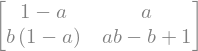

In [2]:
a, b = sp.symbols('a, b')
p_symbolic = sp.Matrix([[1-a, a], [b*(1-a), (1-b) + a*b]])
p_symbolic

За да добиеме нумеричка, едноставно, ќе ги замениме симболите со посакуваните вредности.

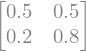

In [3]:
p = p_symbolic.subs(a, 0.5).subs(b, 0.4)
p

In [4]:
states = ['free', 'busy']
p = pd.DataFrame(np.array(p).astype(float), columns=states, index=states)
p

free  busy
free   0.5   0.5
busy   0.2   0.8


DISCRETE-TIME MARKOV CHAIN
 SIZE:         2
 CLASSES:      1
  - RECURRENT: 1
  - TRANSIENT: 0
 ABSORBING:    NO
 APERIODIC:    YES
 IRREDUCIBLE:  YES
 ERGODIC:      YES



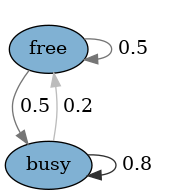

In [5]:
def draw_markov_chain(chain):
    plt.ioff()
    print(chain)
    fig, ax = mc.plot_graph(chain)
    ax.set_visible(False)
    plt.show()

chain = mc.MarkovChain(p, states)
draw_markov_chain(chain)

### Одговор на задача 2

*  Ако веројатноста за доаѓање на нова задача во кој било момент е 75%, колкава треба да е веројатноста на извршување на тековна задача за роботот да има искористеност од 99% во стационарен режим? Дали одговорот има логика? На што се должи тоа?

Сега $a = 0.75$, а $b$ е непозната. Искористеноста ќе ја добиеме ако ја пресметаме стационарната распределба. Таа зависи од $b$, а библиотеката `pydtmc` работи само за нумеричка вредност за $b$. Затоа ќе ја искористиме библиотеката `sympy` за симболички да ја решиме стационарната распределба на веројатност.  

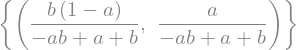

In [6]:
pi_1, pi_2 = sp.symbols('pi_1, pi_2')
pi = sp.Matrix([[pi_1, pi_2]])
Ax = pi * p_symbolic

equations = [
    sp.Eq(Ax[0],  pi_1),
    sp.Eq(Ax[1],  pi_2),
    sp.Eq(pi_1 + pi_2, 1)    
]

solution = sp.linsolve(equations, pi_1, pi_2)
solution

Гледаме дека решението зависи и од $a$ и од $b$. Веднаш ќе го замениме $a$.

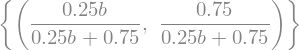

In [7]:
solution = solution.subs(a, 0.75)
solution

Стационарната распределба на веројатност за зафатената состојба е вториот израз во горниот резултат. Ќе ја зачуваме во променлива и ќе ја пратиме на функција која ќе ни ја поедностави (реши) неравенката.

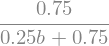

In [8]:
busy_state_pi = solution.args[0][1]
busy_state_pi

In [9]:
sp.reduce_inequalities(busy_state_pi > 0.99)

Добиваме услов $b < 0.3$ за да имаме зафатеност над 99%. Но, ова не во ред ако го имаме предвид реалниот проблем. Математички сѐ си е во ред, но ако имаме желба роботот да сработи што повеќе, ова не ни се допаѓа. $b$ е веројатност роботот да заврши со работа во даден момент, а ниска вредност на $b$ значи дека тој ќе биде зафатен решавајќи само една задача. Ова доаѓа исто како да го пофалиш најспориот работник дека работи, наспротив вредниот кој веќе ја завршил работата и сега е слободен.